# Intro to Scientific Computing

NAMES: Tyler Stewart , Rajdipa Chowdhury

DATE: 10/25/17

#### General guidelines
* Include labels in your plots and make them look good
* Include units when needed 
* Include enough comments in your code to make it usable by others

In [10]:
# Import numpy
from numpy import *
# Import matplotlib.pyplot
from matplotlib.pyplot import *
%matplotlib inline
from IPython.display import Image


# Evaluate this cell to define some constants (cgs units) 
AU = 1.49597870e+13  # cm 
MSun = 1.98911e+33   # g 
Mearth = 5.99219e+27 # g
Rearth = 6.371e+8    # cm
SecInDay = 86400.
SecInYear = SecInDay*365.25
kB=1.3807e-16       # erg / K 
avro=6.022141e+23   # particles per mole
Lsun=3.839e+33      # erg/s
sigmaB = 5.6704e-5  # erg / cm^2 / s / K^4

In [2]:
Image("../../../Downloads/PIA01081-Color_Mosaic_and_Active_Volcanic_Plumes_on_Io.jpg",width=300)

# Volcanos on Jupiter's Moon Io

Jupiter's moon, Io, has some amazing Volcanos (shown in the image above!!)  Today we're going to calculate the trajectories of these plumes flung out from the volcanos. 

If you're curious to learn more, please have a look at this Wikipedia article (which has tons of awesome pictures, and a gif of one of these eruptions). https://en.wikipedia.org/wiki/Volcanology_of_Io. 


### a) Projectile Motion on Io

This problem is very similar to what we did with the ballistic trajectory of a ball, but instead of the Earth's gravititational field, we have Io's. On Io, the local gravitational acceleration is -179.6 cm/s (about 1/4 what it is on earth). Define a variable:

`agrav_y = -179.6`

Particles are launched out of the volcano with a velocity of 1 km/s = $10^5$ cm/s. Define a variable 

`v0 = 1.e5 #cm/s`

Now define two functions: `xpos(t,theta)` and `ypos(t,theta)`. Both should take a time, `t` and an angle, `theta` (in radians). Theta is the angle that the particle is launched at (measured up from the x-axis -- so that $0$ is horizontal and $\pi/2$ is vertical).  These functions should return the $x$ and $y$ position of a given projectile (launched at angle theta) as a function of time. 


Think of a way to test your work: what do you expect for theta = 0, for theta = pi/2 ?

In [3]:
"""here we derived the equations of xpos, ypos and the time of landing. we used the equation for time of landing into
a if statement condition. for example if the time exceeds the time of landing then the ypos will be zero. and the 
x position will be the final xpos at the time of landing. the ball will stop moving after it lands on the ground.
"""
agrav_y = -179.6 #cm/s
v0 = 1e+5 #cm/s
def xpos(t,theta):
    if t > (-2*v0*sin(theta))/agrav_y:  #time is seconds  
        return ((-2*v0*sin(theta))/agrav_y)*v0*cos(theta)  
    else:
        return v0*cos(theta)*t
def ypos(t,theta):
    if t > (-2*v0*sin(theta))/agrav_y:  
        return 0
    else: 
        return (v0*sin(theta)*t)+(0.5*agrav_y*t**2)
#Tested equation with online calculator and maade sure values matched
print xpos(10,0)
print ypos(10,0)
print xpos(964.393545417,pi/3)
print ypos(964.393545417,pi/3)

0.0
0
48219677.2708
0


### b) Time of landing

Write a function (with theta as the only argument) that uses Scipy's `bisect` to find the time that a particle (launched at angle theta) takes to return to the ground. Remember you have to give an interval $(a,b)$ that contains the root, and that plotting the $y$ vs $t$ before using bisect might give you a better idea of what to use as $(a,b)$.

Use your function to compute the time of landing for a particle launched at an angle of 60 degrees (convert to radians before you try to use this!).

Note: Since the function ```ypos()``` depends on two variables ```(t,theta)```, you will have to instruct the function ```bisect``` what value of ```theta``` you want to use  each time you call the function ```bisect()```. Google the instructions of this function or use ```bisect?``` to see how this is done.



In [4]:
 """this time we used the bisect funtion to find the time of landing and so we defined xpos and ypos without the if 
 condition and then incoporated the the bisect funtion to find the time of landing  
 """  
agrav_y = -179.6 #cm/s
v0 = 1e+5 #cm/s
def xpos(t,theta):
        return v0*cos(theta)*t
def ypos(t,theta):
        return (v0*sin(theta)*t)+(0.5*agrav_y*t**2)


from scipy.optimize import bisect
theta_b = pi/3
def Function(theta):
    return bisect(ypos,1.,10000.,args=theta) #Make the function range longer
print Function(pi/3)

964.393545417


964.393545417
-2.6524066925e-06


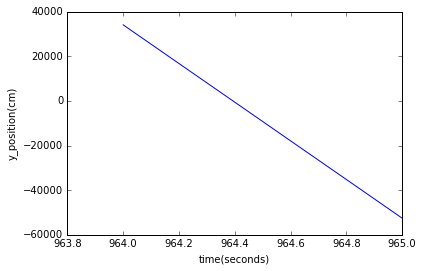

In [5]:
print bisect(ypos,963.,965.,args=pi/3,)  #testing out values 
print ypos(964.393545417,pi/3)
t = arange(964,965,.001)
y = ypos(t,pi/3)
plot(t,y) #plotting time with y position
xlabel('time(seconds)')
ylabel('y_position(cm)')


### c) Plotting trajectories

Write another function (again with a single argument, theta), that makes a plot of the trajectory. 
Call your function `plot_traj(theta)`.

Steps to make inside this function:

- your function should calculate the time of landing for a given theta (remember you can call a function inside another function)

- then define an array of times from zero to the time of landing

- use these times (and theta) to plot the x,y position of the particle throughout it's flight. 

- include the argument `alpha=0.1` in your function `plot()` to make your line mostly see-through

- Finally define a vectorized version of your function with a command like: 
`plot_trajectories = vectorize(plot_traj)`

Call your function for the trajectory above with an angle of 60 degrees (again, convert to radians!!) -- it will be a faint line, but that's okay. 


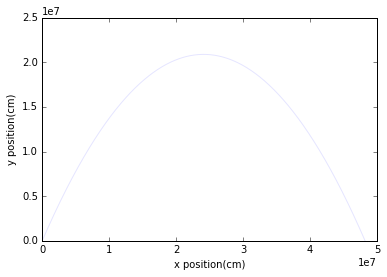

In [6]:
def plot_traj(theta):
    Function(theta)  #calling Function to calulate the time of landing for a given theta
    t = arange(0,Function(theta),1) #an array of times from zero to the time of landing 
    x = xpos(t,theta)
    y = ypos(t,theta)
    plot_trajectories = vectorize(plot_traj)  #vectorize version of plot_traj
    return plot(x,y,alpha=0.1)  #plot of x and y postition


    
plot_traj(theta_b)   #calling plot_traj to create a plot
xlabel('x position(cm)')
ylabel('y position(cm)')


array([<matplotlib.lines.Line2D object at 0x111c87c90>], dtype=object)

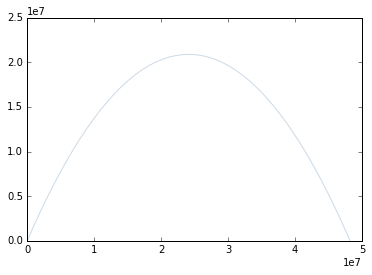

In [8]:
plot_trajectories = vectorize(plot_traj) 
plot_trajectories(theta_b)

### d) Monte Carlo (random) Trajectories

The volcano doesn't just launch one particle, it launches a lot.  We'll create these through random sampling. 

d1) Create an array of 1000 random samples of the launching angle, `theta`. These should be uniformly distributed between 

`theta_min = pi/4.
theta_max = pi/2. `

The instruction `random.rand(1000)` (from `numpy`) will produce an array of 1000 random samples with values between zero and one. 

* Transform this array so that it samples the range between `theta_min` and `theta_max`. Assign a new array (for example `theta_array`) to the result of this manipulation.
  
d2) Use your function `plot_trajectories` on your array of random angles `theta_array`: this should give you a plot of the paths of 1000 particles being flung out of the volcano. 

array([list([<matplotlib.lines.Line2D object at 0x111c91350>]),
       list([<matplotlib.lines.Line2D object at 0x111ff1210>]),
       list([<matplotlib.lines.Line2D object at 0x111ff1850>]),
       list([<matplotlib.lines.Line2D object at 0x111ff1e90>]),
       list([<matplotlib.lines.Line2D object at 0x111ffd510>]),
       list([<matplotlib.lines.Line2D object at 0x111ffdb50>]),
       list([<matplotlib.lines.Line2D object at 0x111efd0d0>]),
       list([<matplotlib.lines.Line2D object at 0x112009810>]),
       list([<matplotlib.lines.Line2D object at 0x112009e50>]),
       list([<matplotlib.lines.Line2D object at 0x1120144d0>]),
       list([<matplotlib.lines.Line2D object at 0x112014b10>]),
       list([<matplotlib.lines.Line2D object at 0x112021190>]),
       list([<matplotlib.lines.Line2D object at 0x1120217d0>]),
       list([<matplotlib.lines.Line2D object at 0x1120091d0>]),
       list([<matplotlib.lines.Line2D object at 0x11202d490>]),
       list([<matplotlib.lines.Line2D ob

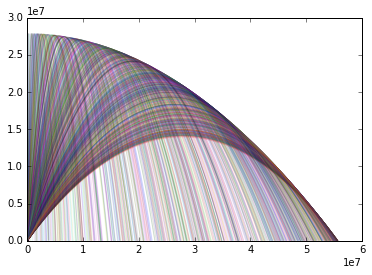

In [9]:
r = random.rand(1000)  #an array of 1000 random samples with values between zero and one
#transforming the array r to get the desired array
def r_2(theta_min,theta_max):
    return theta_min + (theta_max - theta_min)*r

theta_array = r_2(pi/4,pi/2) #pluggin in the desired values for the argumenta
plot_trajectories(theta_array)  #plotting plot_trajectories with theta array as the argument


### e) Ash Distribution on Io's Surface 

To compute the extent of the ash plume, define one more function (of theta) that returns the xlanding position. 
You can do this by finding the xpos at the time of landing (using your previously-defined function). 

- Again, use vectorize on this function to let you apply it to arrays. 

- Assign an array (call it `rland`) by applying your new function to your randomly-sampled array of volcano-launching-angles. 


Plot a histogram of these landing distances. If your array is called `rland`, the command is:

`hist(rland,bins=30,histtype='step')`


(array([  22.,   14.,   21.,   19.,   23.,   25.,   23.,   27.,   17.,
          23.,   19.,   24.,   27.,   22.,   29.,   22.,   28.,   23.,
          27.,   28.,   25.,   30.,   36.,   37.,   35.,   33.,   52.,
          63.,   70.,  156.]),
 array([   183697.08076515,   2033537.10017003,   3883377.11957492,
          5733217.1389798 ,   7583057.15838468,   9432897.17778957,
         11282737.19719445,  13132577.21659934,  14982417.23600422,
         16832257.25540911,  18682097.27481399,  20531937.29421888,
         22381777.31362376,  24231617.33302864,  26081457.35243353,
         27931297.37183841,  29781137.3912433 ,  31630977.41064818,
         33480817.43005307,  35330657.44945795,  37180497.46886284,
         39030337.48826773,  40880177.50767261,  42730017.52707749,
         44579857.54648238,  46429697.56588726,  48279537.58529215,
         50129377.60469703,  51979217.62410191,  53829057.6435068 ,
         55678897.66291168]),
 <a list of 1 Patch objects>)

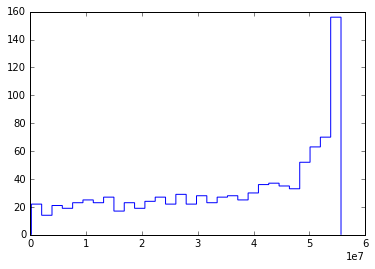

In [10]:
def Final(theta):
    t = Function(theta)  #the time of landing for a given theta
    return xpos(t,theta)  #returns the x postion
Final(theta_b)   #testing the function
Final_V = vectorize(Final)  #vectorizing the function
rland = Final_V(theta_array)  #defined an array by applying Final() to our randomly-sampled array(theta_array) of volcano-launching-angles. 


Final_V(theta_b)
hist(rland,bins=30,histtype='step') #ploting a histogram 

## Optional Challenge Question 1: 
### More on Io's plumes

#### From Wikipedia:
Examples of Prometheus-type plumes include Prometheus, Amirani, Zamama, and Masubi. These plumes are usually less than 100 kilometres (62 mi) tall with eruption velocities around 0.5 kilometres per second (0.31 mi/s). Prometheus-type plumes are dust-rich, with a dense inner core and upper canopy shock zone, giving them an umbrella-like appearance. These plumes often form bright circular deposits, with a radius ranging between 100 and 250 kilometres (62 and 155 mi) and consisting primarily of sulfur dioxide frost. 

### Calculating the Opening angle of Io's Prometheus Plumes
Using root-finding, what is the opening angle of a volcanic plume that launches at 0.5 km/s and forms a 150 kilometer radius deposit?